In [95]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import tomllib
from pathlib import Path
from pandas import DataFrame
from common.utils import load_dataset, reduce_mem_usage
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns

### Exploratory Data Analysis

In [96]:
color = sns.color_palette()

In [97]:
train_df: DataFrame = load_dataset("loan-approval-prediction-clone", index=False)
train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [98]:
train_df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [99]:
reduce_mem_usage(train_df, deep=True)

Memory usage of properties dataframe is : 17.76529312133789  MB
******************************
Column:  person_age
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  person_income
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  person_emp_length
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  loan_amnt
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  loan_int_rate
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loan_percent_income
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  cb_person_cred_hist_length
dtype before:  int64
dtype after:  uint8
******************************
**************************

(       person_age  person_income person_home_ownership  person_emp_length  \
 id                                                                          
 0              37          35000                  RENT                  0   
 1              22          56000                   OWN                  6   
 2              29          28800                   OWN                  8   
 3              30          70000                  RENT                 14   
 4              22          60000                  RENT                  2   
 ...           ...            ...                   ...                ...   
 58640          34         120000              MORTGAGE                  5   
 58641          28          28800                  RENT                  0   
 58642          23          44000                  RENT                  7   
 58643          22          30000                  RENT                  2   
 58644          31          75000              MORTGAGE         

<Axes: xlabel='count', ylabel='person_home_ownership'>

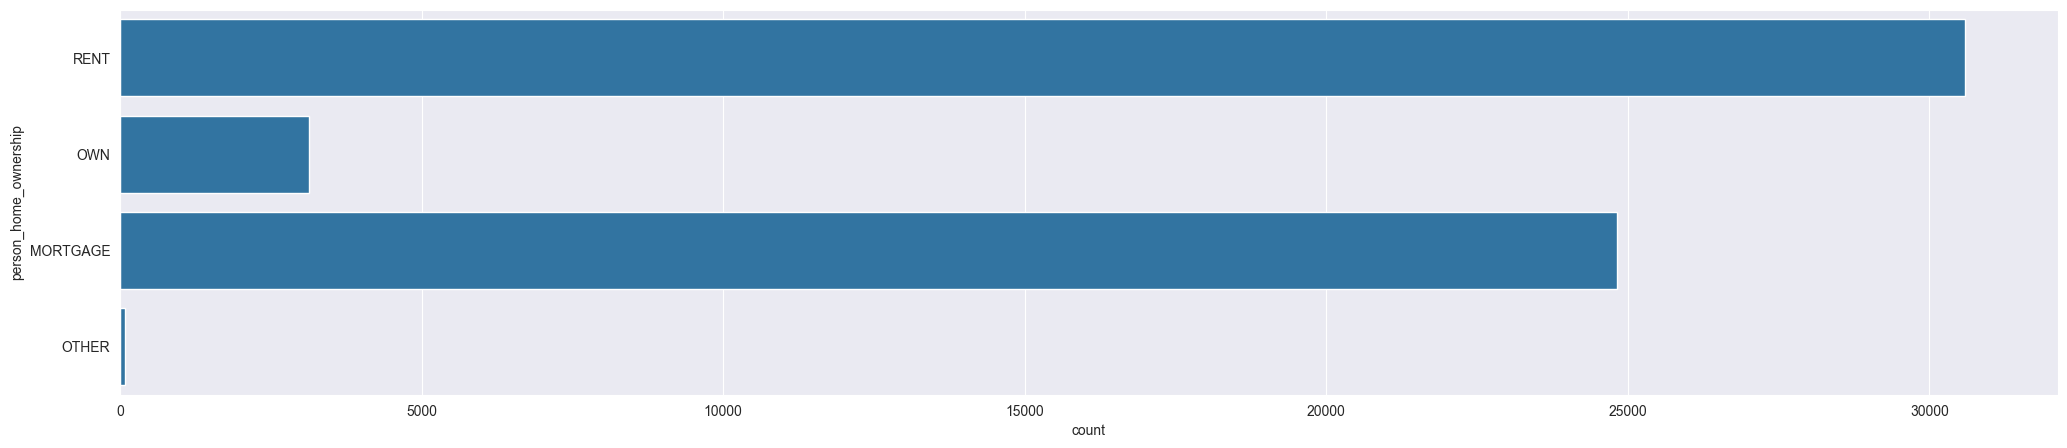

In [100]:
plt.figure(figsize=(25, 5))
sns.countplot(train_df['person_home_ownership'])

In [101]:
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade','cb_person_default_on_file']

#train_df = pd.get_dummies(train_df,
#                          columns=categorical_cols,
#                          drop_first=True)

train_df.columns = [col.lower() for col in train_df.columns]

train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0


In [102]:
train_df.dtypes

person_age                      uint8
person_income                  uint32
person_home_ownership          object
person_emp_length               uint8
loan_intent                    object
loan_grade                     object
loan_amnt                      uint16
loan_int_rate                 float32
loan_percent_income           float32
cb_person_default_on_file      object
cb_person_cred_hist_length      uint8
loan_status                     uint8
dtype: object

In [103]:
train_df['person_age'].head()

id
0    37
1    22
2    29
3    30
4    22
Name: person_age, dtype: uint8

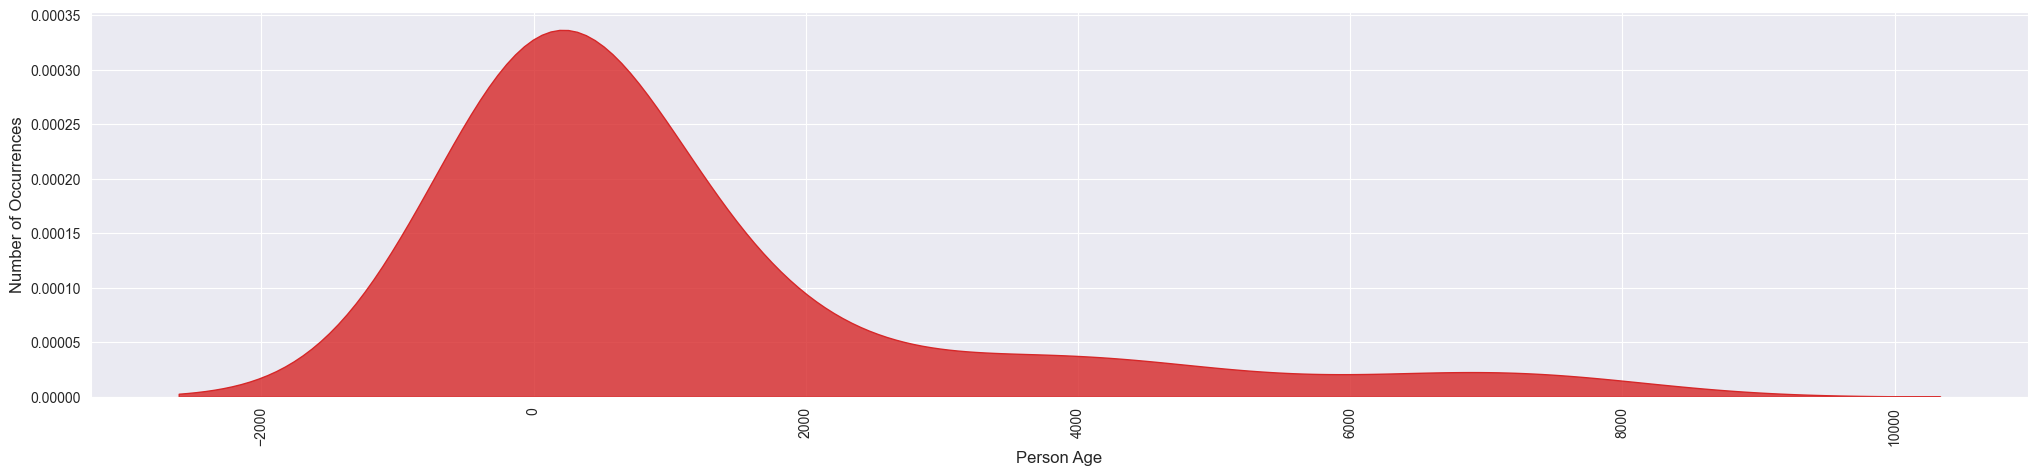

In [109]:
plt.figure(figsize=(25,5))
sns.kdeplot(train_df['person_age'].value_counts(), alpha=0.8, color=color[3], fill=True)
plt.xticks(rotation='vertical')
plt.xlabel('Person Age', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

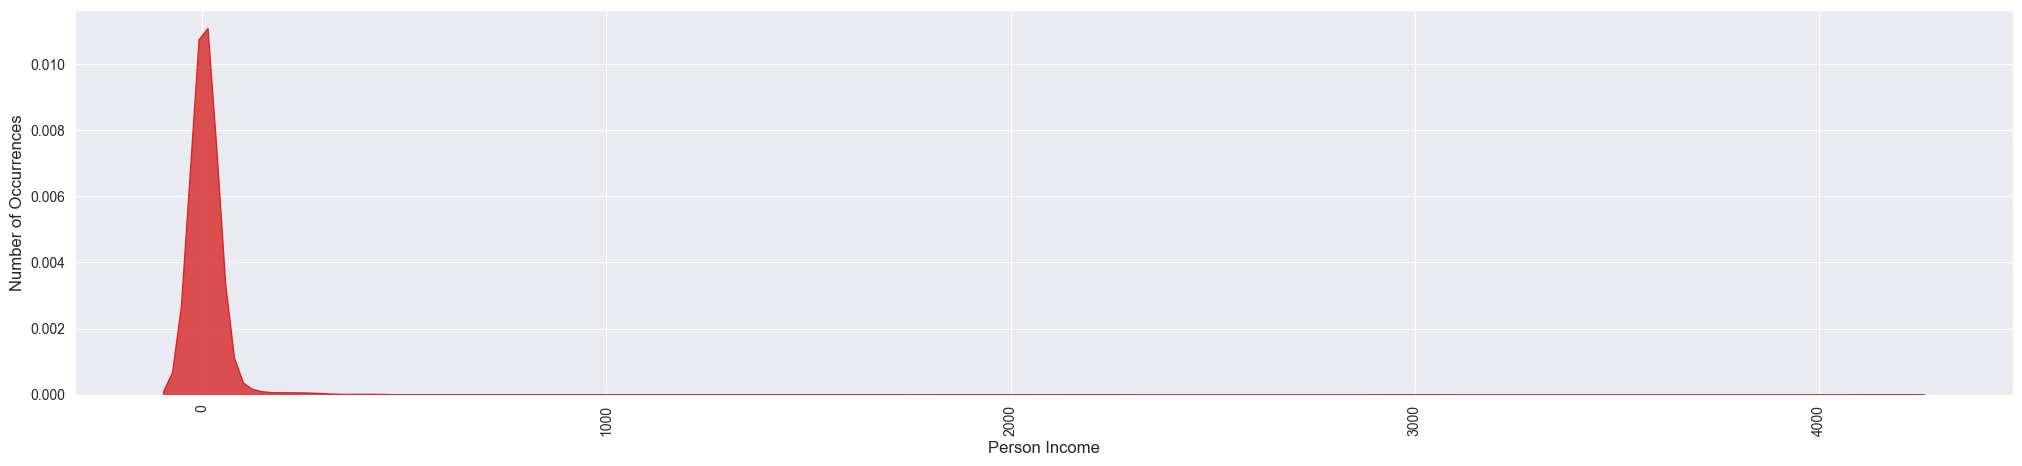

In [110]:
plt.figure(figsize=(25,5))
sns.kdeplot(train_df['person_income'].value_counts(), alpha=0.8, color=color[3], fill=True)
plt.xticks(rotation='vertical')
plt.xlabel('Person Income', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()